In [11]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones, sqrt
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 17
# Алгебра
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [8]:
x, y, z = symbols('x y z')
A = Matrix(((4, -12, 4 * 3**(S(1)/2)), (-12, -7, 5 * 3**(S(1)/2)), (4 * 3**(S(1)/2), 5 * 3**(S(1)/2), 3)))
b = Matrix((0, 0, 0)).T
c = -4
X = Matrix((x, y, z))
u = X.T*A*X
v = b*X
display(A, u, v)
eq1 = simplify(expand(u[0] + 2*v[0] + c))
display(Eq(eq1, 0))

A1 = A.row_join(b.T).col_join(b.row_join(Matrix((c,)))) # (c,) - tuple, состоящий из одного элемента
display(A1)
X1 = X.col_join(Matrix((1,)))
display(Eq(simplify(expand(X1.T*A1*X1))[0], 0))

P = Matrix([])
for item in A.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized())
A2 = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f2 = simplify(expand(X_new.T*A2*X_new))[0]
display(A2, q_f2)
display(Eq(q_f2, 4))
display(Eq(q_f2 / 4, 1))

Matrix([
[        4,       -12, 4*sqrt(3)],
[      -12,        -7, 5*sqrt(3)],
[4*sqrt(3), 5*sqrt(3),         3]])

Matrix([[x*(4*x - 12*y + 4*sqrt(3)*z) + y*(-12*x - 7*y + 5*sqrt(3)*z) + z*(4*sqrt(3)*x + 5*sqrt(3)*y + 3*z)]])

Matrix([[0]])

Eq(4*x**2 - 24*x*y + 8*sqrt(3)*x*z - 7*y**2 + 10*sqrt(3)*y*z + 3*z**2 - 4, 0)

Matrix([
[        4,       -12, 4*sqrt(3),  0],
[      -12,        -7, 5*sqrt(3),  0],
[4*sqrt(3), 5*sqrt(3),         3,  0],
[        0,         0,         0, -4]])

Eq(4*x**2 - 24*x*y + 8*sqrt(3)*x*z - 7*y**2 + 10*sqrt(3)*y*z + 3*z**2 - 4, 0)

Matrix([
[-20, 0,  0],
[  0, 8,  0],
[  0, 0, 12]])

-20*x1**2 + 8*y1**2 + 12*z1**2

Eq(-20*x1**2 + 8*y1**2 + 12*z1**2, 4)

Eq(-5*x1**2 + 2*y1**2 + 3*z1**2, 1)

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

Matrix([
[12,  0,  0],
[ 0, 20,  0],
[ 0,  0, 28]])

12*x1**2 + 20*y1**2 + 28*z1**2

Matrix([
[0],
[0],
[0]])

12*x1**2 + 20*y1**2 + 28*z1**2

-4

Eq(12*x2**2 + 20*y2**2 + 28*z2**2 - 4, 0)

-sqrt(-15*y2**2 - 21*z2**2 + 3)/3

sqrt(-15*y2**2 - 21*z2**2 + 3)/3

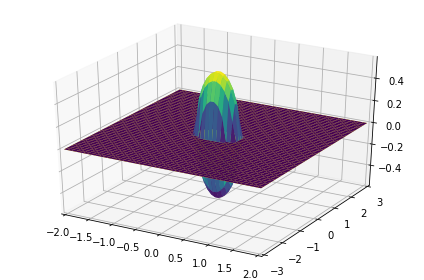

In [12]:
x, y, z = symbols('x y z')
A = Matrix(((24, -2*sqrt(2), -2*sqrt(2)), (-2*sqrt(2), 18, 6), (-2*sqrt(2), 6, 18)))
b = Matrix((0, 0, 0))

X = Matrix((x, y, z))
P = Matrix([])
for item in A.eigenvects():
  degree = item[1]
  for i in range(degree):
    P = P.row_join(item[2][i].normalized())

A_new = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f_new = simplify(expand(X_new.T*A_new*X_new))[0]
display(A_new, q_f_new)

b_new = P.T*b
display(b_new)
u_new = q_f_new + 2*(b_new.T*X_new)[0]
display(u_new)

c_new = -4
for i in range(3):
  c_new -= b_new[i]**2/(A_new[i, i])
display(c_new) 

b_last = zeros(3, 1)
x2, y2, z2 = symbols('x2 y2 z2')
X_last = Matrix((x2, y2, z2))
eq = Eq((X_last.T*A_new*X_last)[0] + 2*(b_last.T*X_last)[0] + c_new, 0)
display(eq)

X = solve(eq, x2)
display(*X)
plot3d(*X, (y2, -2, 2), (z2, -3, 3))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 0]])

x1**2 + y1**2

Eq(x1**2 + y1**2, z1)

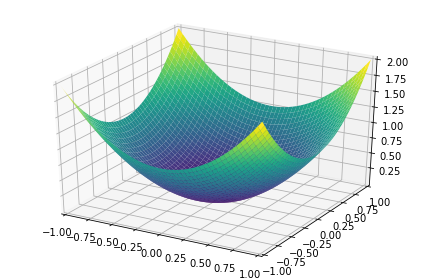

In [13]:
z4, z3 = symbols('z4 z3')
A3 = Matrix(((1, 0, 0), (0, 1, 0), (0, 0, 0)))
b = Matrix((0, 0, 0))

x1, y1, z1 = symbols('x1 y1 z1')
X3_new = Matrix((x1, y1, z1))
q_f2 = simplify(expand(X3_new.T*A3*X3_new))[0]
display(A3, q_f2)

eq2 = Eq(q_f2, z1)
display(eq2)
Z = solve(eq2, z1)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

#143 $u=3 x^{2}+2 \sqrt{3} x y+5 y^{2}+10 z^{2}$

Matrix([
[       3, -sqrt(3),  0],
[-sqrt(3),        5,  0],
[       0,        0, 10]])

Matrix([
[2, 0,  0],
[0, 6,  0],
[0, 0, 10]])

2*x1**2 + 6*y1**2 + 10*z1**2

Matrix([
[0],
[0],
[0]])

2*x1**2 + 6*y1**2 + 10*z1**2

-1

Eq(2*x2**2 + 6*y2**2 + 10*z2**2 - 1, 0)

-sqrt(-12*y2**2 - 20*z2**2 + 2)/2

sqrt(-12*y2**2 - 20*z2**2 + 2)/2

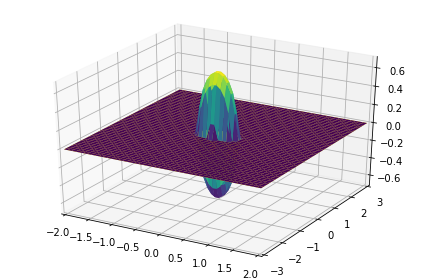

In [14]:
x, y, z = symbols('x y z')
A4 = Matrix(((3, -sqrt(3), 0), (-sqrt(3), 5, 0), (0, 0, 10)))
display(A4)
b = Matrix((0, 0, 0))

X4 = Matrix((x, y, z))
P = Matrix([])
for item in A4.eigenvects():
  degree = item[1]
  for i in range(degree):
    P = P.row_join(item[2][i].normalized())

A4_new = P.T*A4*P
x1, y1, z1 = symbols('x1 y1 z1')
X4_new = Matrix((x1, y1, z1))
q_f_new = simplify(expand(X4_new.T*A4_new*X4_new))[0]
display(A4_new, q_f_new)

b_new = P.T*b
display(b_new)
u_new = q_f_new + 2*(b_new.T*X4_new)[0]
display(u_new)

c_new = -1
for i in range(3):
  c_new -= b_new[i]**2/(A4_new[i, i])
display(c_new) 

b_last = zeros(3, 1)
x2, y2, z2 = symbols('x2 y2 z2')
X4_last = Matrix((x2, y2, z2))
eq4 = Eq((X4_last.T*A4_new*X4_last)[0] + 2*(b_last.T*X4_last)[0] + c_new, 0)
display(eq4)

X = solve(eq4, x2)
display(*X)
plot3d(*X, (y2, -2, 2), (z2, -3, 3))